<a href="https://colab.research.google.com/github/sunyingjian/study-tensorflow/blob/master/tf_keras%E5%BA%8F%E5%88%97%E9%97%AE%E9%A2%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#标准开场
%tensorflow_version 2.x
import tensorflow as tf
print('tensorflow:',format(tf.__version__))
tf.config.list_physical_devices('GPU')
tf.test.is_gpu_available()
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

TensorFlow 2.x selected.
tensorflow: 2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [0]:
#导入电影评论数据，内置在keras中
data=keras.datasets.imdb
#我们设置一个maxword他是用来限制读取进的索引的最大数量的
max_word=10000
#加载数据，他是元组的形式
(x_train,y_train),(x_test,y_test)=data.load_data(num_words=max_word)

In [3]:
#看下数据
x_train.shape

(25000,)

In [4]:
x_train[0]#他这里是用整数代替这个单词

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
data.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [6]:
#看评论长度是否相等
[len(x) for x in x_train]

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

In [0]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train,300)
x_test=keras.preprocessing.sequence.pad_sequences(x_test,300)

#英文转数字索引

In [8]:
test='i am a student'
dict((word,test.split().index(word)) for word in test.split())

{'a': 2, 'am': 1, 'i': 0, 'student': 3}

#建立模型

In [17]:
model=keras.models.Sequential()
model.add(layers.Embedding(10000,50,input_length=300))
#经过这一层之后呢，这就变成了一个三维的数据，而且这层没有激活函数
#我们只有把他们变成二维的才能add接下来的Dense层
#所以我们在这里添加一个flatten层
#现在的情况是这样的(2500,300,50)的向量
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(64,activation='relu', 
                       kernel_regularizer=regularizers.l2(0.01)),
                    activity_regularizer=regularizers.l1(0.01))
#这里就是在进行正则化操作
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
#因为这里是一个二分类问题所以他的最后一层输出
#就是输出了1个out 激活函数采用的sigmoid
model.summary()

NameError: ignored

In [0]:
#编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['acc'])
#当然这里可以直接写adam,因为这是一个二分类所以用
#binary_corssentropy

In [11]:
#训练模型
history=model.fit(x_train,y_train,epochs=15,batch_size=256,
          validation_data=(x_test,y_test))
#所以我们看到这个fit中首先是要有训练集的然后是epoch 还有我们一次扔多少进去
#还有我们加了valiadton_data进行测试集的操作

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 4s 145us/sample - loss: 0.6769 - acc: 0.6162 - val_loss: 0.6296 - val_acc: 0.7753
Epoch 2/15
25000/25000 [==============================] - 3s 107us/sample - loss: 0.5070 - acc: 0.8099 - val_loss: 0.4004 - val_acc: 0.8531
Epoch 3/15
25000/25000 [==============================] - 3s 107us/sample - loss: 0.3349 - acc: 0.8727 - val_loss: 0.3193 - val_acc: 0.8723
Epoch 4/15
25000/25000 [==============================] - 3s 107us/sample - loss: 0.2666 - acc: 0.9005 - val_loss: 0.2944 - val_acc: 0.8802
Epoch 5/15
25000/25000 [==============================] - 3s 108us/sample - loss: 0.2298 - acc: 0.9151 - val_loss: 0.2832 - val_acc: 0.8838
Epoch 6/15
25000/25000 [==============================] - 3s 106us/sample - loss: 0.2018 - acc: 0.9280 - val_loss: 0.2819 - val_acc: 0.8863
Epoch 7/15
25000/25000 [==============================] - 3s 107us/sample - loss: 0.1797 - acc: 0.9374 - val_l

#对history中的数据进行绘图

In [12]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

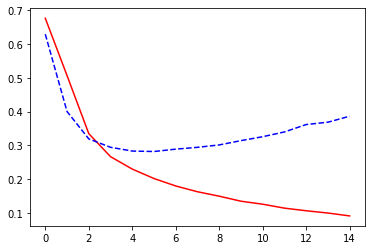

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
#魔术命令
#看一下值的变化
plt.plot(history.epoch,history.history['loss'],'r')
#这里是epoch做横坐标，loss损失函数做纵坐标并且是红色的
plt.plot(history.epoch,history.history['val_loss'],'b--')
#这里是测试机的

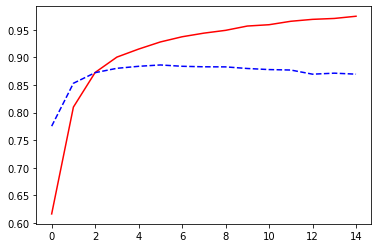

In [14]:
plt.plot(history.epoch,history.history['acc'],'r')
plt.plot(history.epoch,history.history['val_acc'],'b--')